<a href="https://colab.research.google.com/github/LabonnoKhanBonna/BBA2-Game-Zone-assingment-2/blob/main/Copy_of_potatoClass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive,files
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import *
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, concatenate
from tensorflow.keras.models import Model
from keras.utils import *
from keras.models import *
from keras.layers import *
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from numpy.random import seed
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.applications.inception_v3 import InceptionV3
import pathlib
import PIL
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install keras

In [3]:
des_dir='/content/drive/MyDrive/Potato'
data_dir = pathlib.Path(des_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


In [4]:
batch_size = 32
img_height = 128
img_width = 128
tf.random.set_seed(42)

In [5]:
img_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2176 files belonging to 3 classes.


In [6]:
class_names = img_ds.class_names
num_classes = len(class_names)
print(class_names)

['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']


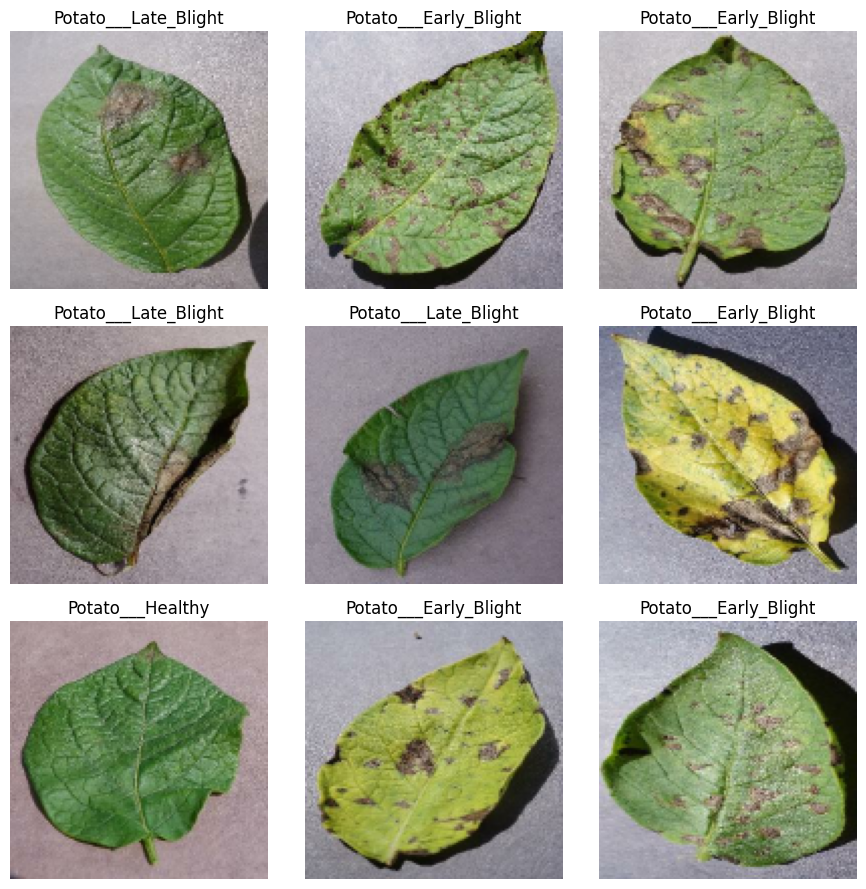

In [7]:
import matplotlib.pyplot as plt

# Assuming you have 'class_names' defined somewhere
# Assuming 'img_ds' is your dataset

plt.figure(figsize=(9, 9))

try:
    for images, labels in img_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]], fontsize=12)  # Adjust label font size
            plt.axis("off")
except KeyboardInterrupt:
    plt.close()  # Close the plot gracefully on interrupt

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot


In [8]:
# Assuming 'img_ds' is your dataset

dataset_length = len(img_ds)

print("Length of the dataset:", dataset_length)



Length of the dataset: 68


In [10]:
train_size = 0.8
dataset_length = len(img_ds)
train_length = int(dataset_length * train_size)

print("80% of the dataset length:", train_length)


80% of the dataset length: 54


In [11]:
# Assuming 'img_ds' is your dataset

dataset_length = len(img_ds)

print("Length of the dataset:", dataset_length)



Length of the dataset: 68


In [14]:
train_size = 0.8
dataset_length = len(img_ds)  # Assuming img_ds is your dataset
train_length = int(dataset_length * train_size)

print("80% of the dataset length:", train_length)


80% of the dataset length: 54


In [28]:
train_sample_count = 0

# Iterate through the training dataset and count the samples
for batch in train_ds:
    train_sample_count += len(batch[0])  # Assuming each batch is a tuple with (images, labels)

print("Number of samples in the training dataset:", train_sample_count)



Number of samples in the training dataset: 1728


In [16]:
val_size = 0.1
dataset_length = len(img_ds)  # Assuming img_ds is your dataset
val_length = int(dataset_length * val_size)

print("10% of the dataset length:", val_length)


10% of the dataset length: 6


In [17]:
val_size = 0.1
dataset_length = len(img_ds)  # Assuming img_ds is your dataset
val_length = int(dataset_length * val_size)

print("10% of the dataset length:", val_length)



10% of the dataset length: 6


In [18]:
train_ds = img_ds.take(54)
num_train_samples = len(list(train_ds))  # Count the number of samples in the training dataset

print("Number of samples in the training dataset:", num_train_samples)



Number of samples in the training dataset: 54


In [19]:
num_train_samples = train_ds.reduce(0, lambda x, _: x + 1).numpy()
print("Number of samples in the training dataset:", num_train_samples)




Number of samples in the training dataset: 54


In [20]:
test_ds = img_ds.skip(54)
num_test_samples = len(list(test_ds))

print("Number of samples in the test dataset:", num_test_samples)


Number of samples in the test dataset: 14


In [21]:
val_size = 0.1
dataset_length = len(img_ds)  # Assuming img_ds is your dataset
val_length = int(dataset_length * val_size)

print("10% of the dataset length:", val_length)


10% of the dataset length: 6


In [22]:
# Assuming you want to skip 10% of the test dataset
skip_count = int(num_test_samples * 0.1)
val_ds = test_ds.skip(skip_count)

# Calculate the length of the validation dataset
val_length = len(list(val_ds))

print("Number of samples in the validation dataset:", val_length)


Number of samples in the validation dataset: 13


In [23]:
# Assuming you want to skip 6 elements from test_ds
skip_count = 6
skipped_test_ds = test_ds.skip(skip_count)

# Count the number of samples in the skipped test dataset
num_skipped_test_samples = len(list(skipped_test_ds))

print("Number of samples in the test dataset after skipping:", num_skipped_test_samples)


Number of samples in the test dataset after skipping: 8


In [24]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)

    # Shuffle the dataset if required
    if shuffle:
        ds = ds.shuffle(shuffle_size, reshuffle_each_iteration=True)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)

    return train_ds, val_ds, test_ds


In [25]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(img_ds, train_split=0.8, val_split=0.1, test_split=0.1)


In [26]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)

    # Shuffle the dataset if required
    if shuffle:
        ds = ds.shuffle(shuffle_size, reshuffle_each_iteration=True)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)

    return train_ds, val_ds, test_ds


In [27]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(img_ds)


In [29]:
train_ds_length = len(list(train_ds))
print("Number of samples in the training dataset:", train_ds_length)


Number of samples in the training dataset: 54


In [30]:
val_ds_length = len(list(val_ds))
print("Number of samples in the validation dataset:", val_ds_length)


Number of samples in the validation dataset: 6


In [31]:
# Convert test_ds to a list and then find the length
test_ds_length = len(list(test_ds))
print("Number of samples in the test dataset:", test_ds_length)


Number of samples in the test dataset: 6


In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [33]:
for image_batch, labels_batch in img_ds.take(1):
    # Normalize the first image in the batch
    normalized_image = image_batch[0].numpy() / 255.0

    # Print the normalized image
    print(normalized_image)



[[[0.5892157  0.5852941  0.6166667 ]
  [0.57941175 0.5754902  0.6068627 ]
  [0.577451   0.5735294  0.60490197]
  ...
  [0.6245098  0.63235295 0.67941177]
  [0.6313726  0.6392157  0.6862745 ]
  [0.6372549  0.64509803 0.69215685]]

 [[0.5637255  0.5598039  0.59117645]
  [0.54901963 0.54509807 0.5764706 ]
  [0.5568628  0.5529412  0.58431375]
  ...
  [0.61764705 0.6254902  0.672549  ]
  [0.622549   0.63039213 0.67745095]
  [0.62647057 0.6343137  0.6813725 ]]

 [[0.55196077 0.5480392  0.57941175]
  [0.56078434 0.5568628  0.5882353 ]
  [0.56078434 0.5568628  0.5882353 ]
  ...
  [0.6156863  0.62352943 0.67058825]
  [0.6186274  0.62647057 0.6735294 ]
  [0.61960787 0.627451   0.6745098 ]]

 ...

 [[0.39313725 0.38137254 0.41666666]
  [0.40392157 0.39215687 0.42745098]
  [0.3735294  0.3617647  0.3970588 ]
  ...
  [0.44705883 0.4392157  0.49019608]
  [0.44607842 0.43823528 0.48921567]
  [0.44117647 0.43333334 0.48431373]]

 [[0.39019608 0.37843138 0.4137255 ]
  [0.37941176 0.36764705 0.40294117]


In [34]:
IMAGE_SIZE = 125
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])


In [35]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])


In [36]:
BATCH_SIZE = 32

In [37]:
CHANNELS = 3  # Assuming it's a typical RGB image
IMAGE_SIZE = 128  # Assuming square images of size 128x128
BATCH_SIZE = 32  # Assuming a batch size of 32

In [38]:
from tensorflow.keras import layers, models

# Assuming you have defined IMAGE_SIZE, CHANNELS, and BATCH_SIZE

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Adjusted kernel size
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Adjusted kernel size
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Adjusted kernel size
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Adjusted kernel size
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model with the specified input shape
model.build(input_shape=input_shape)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming you have a train_ds and val_ds
model.fit(train_ds, validation_data=val_ds, epochs=5)




Epoch 1/5
54/54 [==============================] - 68s 1s/step - loss: 0.9266 - accuracy: 0.4705 - val_loss: 0.9076 - val_accuracy: 0.4375
Epoch 2/5
54/54 [==============================] - 49s 906ms/step - loss: 0.7692 - accuracy: 0.6111 - val_loss: 0.6068 - val_accuracy: 0.6927
Epoch 3/5
54/54 [==============================] - 51s 939ms/step - loss: 0.5619 - accuracy: 0.7541 - val_loss: 0.7482 - val_accuracy: 0.6719
Epoch 4/5
54/54 [==============================] - 52s 969ms/step - loss: 0.4165 - accuracy: 0.8177 - val_loss: 0.3952 - val_accuracy: 0.8333
Epoch 5/5
54/54 [==============================] - 50s 916ms/step - loss: 0.2699 - accuracy: 0.8912 - val_loss: 0.3906 - val_accuracy: 0.8438


In [39]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 125, 125, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 125, 125, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 123, 123, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 61, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 64)        0         
 g2D)                                                 

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [41]:
EPOCH = 50

In [42]:
history = model.fit(
train_ds,
batch_size = BATCH_SIZE,
validation_data = val_ds,
verbose = 1,
epochs = EPOCH
)

Epoch 1/50
54/54 [==============================] - 49s 887ms/step - loss: 0.2358 - accuracy: 0.9091 - val_loss: 0.1967 - val_accuracy: 0.9375
Epoch 2/50
54/54 [==============================] - 47s 880ms/step - loss: 0.1928 - accuracy: 0.9300 - val_loss: 0.1617 - val_accuracy: 0.9271
Epoch 3/50
54/54 [==============================] - 46s 861ms/step - loss: 0.1829 - accuracy: 0.9323 - val_loss: 0.1478 - val_accuracy: 0.9531
Epoch 4/50
54/54 [==============================] - 50s 923ms/step - loss: 0.1468 - accuracy: 0.9410 - val_loss: 0.1998 - val_accuracy: 0.9323
Epoch 5/50
54/54 [==============================] - 49s 918ms/step - loss: 0.1645 - accuracy: 0.9433 - val_loss: 0.1531 - val_accuracy: 0.9375
Epoch 6/50
54/54 [==============================] - 47s 867ms/step - loss: 0.1527 - accuracy: 0.9456 - val_loss: 0.1321 - val_accuracy: 0.9323
Epoch 7/50
54/54 [==============================] - 53s 991ms/step - loss: 0.1299 - accuracy: 0.9491 - val_loss: 0.0757 - val_accuracy: 0.9531

In [44]:
len(test_ds)

6

In [45]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 7s 212ms/step - loss: 0.0222 - accuracy: 0.9896


In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
history.history['loss']

[0.23576082289218903,
 0.19276002049446106,
 0.18285559117794037,
 0.14679653942584991,
 0.16445723176002502,
 0.15268491208553314,
 0.12990325689315796,
 0.12952572107315063,
 0.14015589654445648,
 0.12028079479932785,
 0.08937369287014008,
 0.08813032507896423,
 0.10406886041164398,
 0.09660717844963074,
 0.08277890086174011,
 0.10387735813856125,
 0.10023338347673416,
 0.06884505599737167,
 0.08701415359973907,
 0.06798526644706726,
 0.06654036790132523,
 0.08110613375902176,
 0.10741177201271057,
 0.07004062831401825,
 0.06112239882349968,
 0.050111379474401474,
 0.05187484249472618,
 0.08380509912967682,
 0.06678906083106995,
 0.05314731225371361,
 0.07208312302827835,
 0.06734615564346313,
 0.08036013692617416,
 0.06805223226547241,
 0.0549277625977993,
 0.06289488077163696,
 0.05182495340704918,
 0.048475004732608795,
 0.07252722978591919,
 0.030595945194363594,
 0.07890284806489944,
 0.03855753690004349,
 0.04011566564440727,
 0.036246638745069504,
 0.03062005341053009,
 0.0408

In [49]:
len(history.history['accuracy'])

50

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

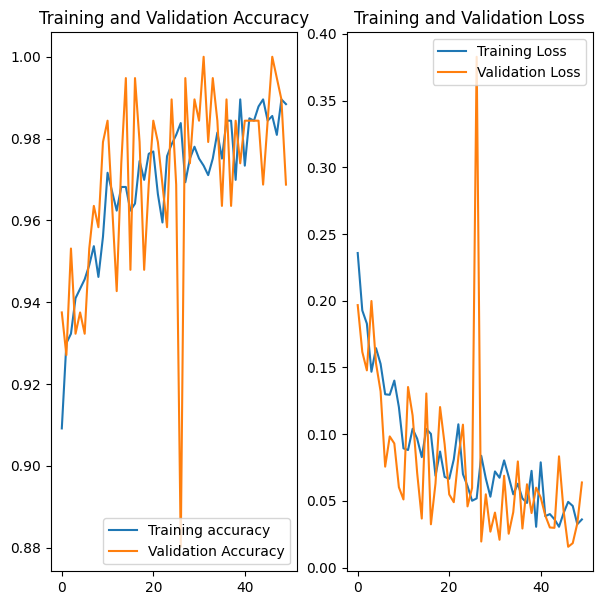

In [57]:
plt.figure(figsize=(7, 7))  # Use figsize instead of figuresize

plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict
Actual Label: Potato___Healthy
1/1 [==============================] - 0s 242ms/step
Predicted Label: Potato___Healthy


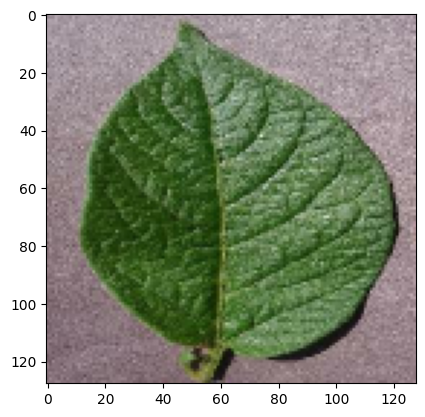

In [70]:
for images_batch, labels_batch in test_ds.take(1):
 first_image = images_batch[0].numpy().astype("uint8")
 print("First image to predict")
 plt.imshow(first_image)
 print("Actual Label:",class_names[labels_batch[0].numpy()])

 batch_prediction = model.predict(images_batch)
 print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])
 plt.imshow(first_image)


In [74]:
def predict(model, img):
    img_array = tf.keras.preprocessing.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, axis=0)  # Added axis argument

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]))  # Corrected the round function

    return predicted_class, confidence


1/1 [==============================] - 0s 29ms/step


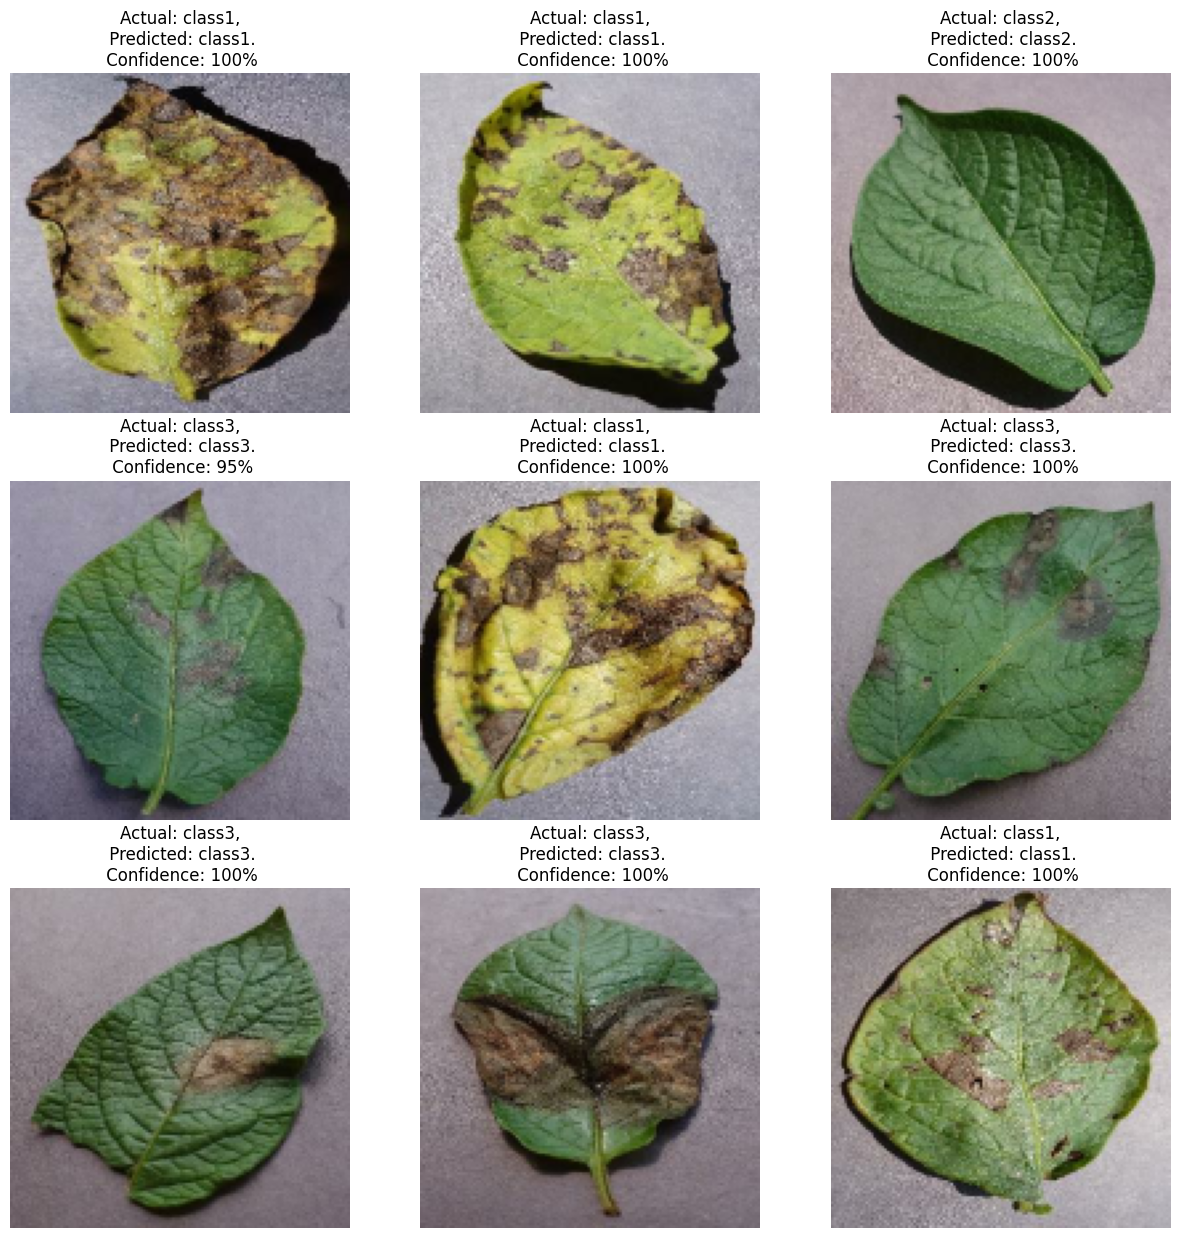

In [83]:
# Assuming class_name is a list of class names
class_name = ['class1', 'class2', 'class3', ...]  # Replace with your actual class names

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_name[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")



